In [2]:
import pandas as pd
import numpy as np
import os
import json


## Get Data

In [4]:
e_df = pd.read_csv('data/ev_data.csv')
z_df = pd.read_csv('data/uszipcode_data.csv/uszipcode_data.csv')

C:\Users\SMaharana\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
e_df.shape


(145108, 14)

In [8]:
e_df.head()

,Unnamed: 0,County,County GEOID,DMV ID,Exp_year,Registration Expiration Date,Registration Valid Date,VIN Model Year,VIN Prefix,Valid_year,Vehicle Name,ZIP Code,file_name,state
0,14763,NaN,NaN,1.0,2019.0,2019-12-31,2018-12-31,J,5YJSA1E2,2018.0,NaN,80138.0,co_ev_registrations_public.xlsx,co
1,14764,NaN,NaN,1.0,2019.0,2019-12-31,2018-12-31,J,5YJXCAE2,2018.0,NaN,81620.0,co_ev_registrations_public.xlsx,co
2,14765,NaN,NaN,1.0,2019.0,2019-12-31,2018-12-31,C,1G1RD6E4,2018.0,NaN,80538.0,co_ev_registrations_public.xlsx,co
3,14766,NaN,NaN,1.0,2019.0,2019-11-30,2018-12-31,G,WBY2Z2C5,2018.0,NaN,80915.0,co_ev_registrations_public.xlsx,co
4,14767,NaN,NaN,1.0,2019.0,2019-12-31,2018-12-31,F,5YJSA1S2,2018.0,NaN,80228.0,co_ev_registrations_public.xlsx,co


In [14]:
z_df.columns

Index(['Unnamed: 0', 'zipcode_type', 'major_city', 'post_office_city',
       'common_city_list', 'county', 'state', 'lat', 'lng', 'timezone',
       'radius_in_miles', 'area_code_list', 'population', 'population_density',
       'land_area_in_sqmi', 'water_area_in_sqmi', 'housing_units',
       'occupied_housing_units', 'median_home_value',
       'median_household_income', 'zipcode', 'population_by_year',
       'population_by_age', 'population_by_gender', 'population_by_race',
       'head_of_household_by_age', 'families_vs_singles',
       'households_with_kids', 'children_by_age', 'housing_type',
       'year_housing_was_built', 'housing_occupancy', 'vancancy_reason',
       'owner_occupied_home_values', 'rental_properties_by_number_of_rooms',
       'monthly_rent_including_utilities_studio_apt',
       'monthly_rent_including_utilities_1_b',
       'monthly_rent_including_utilities_2_b',
       'monthly_rent_including_utilities_3plus_b', 'employment_status',
       'average_house

## Adding Features and target variables

### reg_count
Count of registrations per zip code

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [31]:
temp_df = pd.DataFrame({'reg_count' : e_df.groupby(['ZIP Code']).size()}).reset_index()

In [19]:
temp_df['ZIP Code'] = temp_df['ZIP Code'].astype(int)

In [75]:
df = pd.merge(temp_df,z_df, left_on = 'ZIP Code',right_on= 'zipcode')

In [76]:
df.head()

,ZIP Code,reg_count,Unnamed: 0,zipcode_type,major_city,post_office_city,common_city_list,county,state,lat,...,sources_of_household_income____average_income_per_household_by_income_source,household_investment_income____percent_of_households_receiving_investment_income,household_investment_income____average_income_per_household_by_income_source,household_retirement_income____percent_of_households_receiving_retirement_incom,household_retirement_income____average_income_per_household_by_income_source,source_of_earnings,means_of_transportation_to_work_for_workers_16_and_over,travel_time_to_work_in_minutes,educational_attainment_for_population_25_and_over,school_enrollment_age_3_to_17
0,5001.0,20,0,Standard,White River Junction,"White River Junction, VT","['White River Junction', 'White Riv Jct']",Windsor County,VT,43.66,...,"[{'key': 'Data', 'values': [{'x': 'Wages', 'y'...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'Worked Full...","[{'key': 'Data', 'values': [{'x': 'Car, Truck,...","[{'key': 'Data', 'values': [{'x': '< 10', 'y':...","[{'key': 'Data', 'values': [{'x': 'Less Than H...","[{'key': 'Data', 'values': [{'x': 'Enrolled In..."
1,5032.0,6,1,Standard,Bethel,"Bethel, VT",['Bethel'],Windsor County,VT,43.80,...,"[{'key': 'Data', 'values': [{'x': 'Wages', 'y'...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'Worked Full...","[{'key': 'Data', 'values': [{'x': 'Car, Truck,...","[{'key': 'Data', 'values': [{'x': '< 10', 'y':...","[{'key': 'Data', 'values': [{'x': 'Less Than H...","[{'key': 'Data', 'values': [{'x': 'Enrolled In..."
2,5033.0,14,2,Standard,Bradford,"Bradford, VT",['Bradford'],Orange County,VT,44.00,...,"[{'key': 'Data', 'values': [{'x': 'Wages', 'y'...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'Worked Full...","[{'key': 'Data', 'values': [{'x': 'Car, Truck,...","[{'key': 'Data', 'values': [{'x': '< 10', 'y':...","[{'key': 'Data', 'values': [{'x': 'Less Than H...","[{'key': 'Data', 'values': [{'x': 'Enrolled In..."
3,5034.0,3,3,Standard,Bridgewater,"Bridgewater, VT",['Bridgewater'],Windsor County,VT,43.59,...,"[{'key': 'Data', 'values': [{'x': 'Wages', 'y'...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'Worked Full...","[{'key': 'Data', 'values': [{'x': 'Car, Truck,...","[{'key': 'Data', 'values': [{'x': '< 10', 'y':...","[{'key': 'Data', 'values': [{'x': 'Less Than H...","[{'key': 'Data', 'values': [{'x': 'Enrolled In..."
4,5035.0,4,4,Standard,Bridgewater Corners,"Bridgewater Corners, VT","['Bridgewater Corners', 'Brdgewtr Cors', 'Brid...",Windsor County,VT,43.60,...,"[{'key': 'Data', 'values': [{'x': 'Wages', 'y'...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'Interest', ...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'IRA Distrib...","[{'key': 'Data', 'values': [{'x': 'Worked Full...","[{'key': 'Data', 'values': [{'x': 'Car, Truck,...","[{'key': 'Data', 'values': [{'x': '< 10', 'y':...","[{'key': 'Data', 'values': [{'x': 'Less Than H...","[{'key': 'Data', 'values': [{'x': 'Enrolled In..."


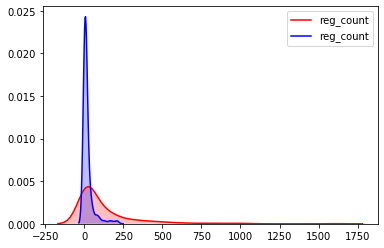

In [95]:
sns.kdeplot(df[df['state']=='WA']['reg_count'], shade=True, color="r")
sns.kdeplot(df[df['state']=='VT']['reg_count'], shade=True, color="b")
plt.show()



Washington has zip codes with double digit registrations. Other states have fewer regs

### population_2015
Get the latest population count by zip code


In [98]:
df.loc[23,'population_by_year'] ### sample data--- convert to dict and then get the last one

"[{'key': 'Data', 'values': [{'x': 2007, 'y': 1210}, {'x': 2008, 'y': 1160}, {'x': 2009, 'y': 1110}, {'x': 2010, 'y': 1118}, {'x': 2011, 'y': 1111}, {'x': 2012, 'y': 1150}, {'x': 2013, 'y': 1100}, {'x': 2014, 'y': 1100}, {'x': 2015, 'y': 1080}]}]"

In [84]:
def get_population(x):
    try:
        dict_x = eval(x)
        return dict_x[0]['values'][-1]['y']
    except:
        return None


In [85]:
df['population_2015'] = df['population_by_year'].apply(get_population)

### ev_per_1000 <--- TARGET VARIABLE

In [90]:
df['ev_per_1000'] = (df['reg_count']/df['population_2015'])*1000

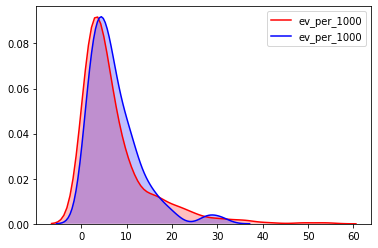

In [96]:
sns.kdeplot(df[(df['state']=='WA')&(df['ev_per_1000'].isnull()!=True)]['ev_per_1000'], shade=True, color="r")
sns.kdeplot(df[(df['state']=='VT')&(df['ev_per_1000'].isnull()!=True)]['ev_per_1000'], shade=True, color="b")

Well, although Washington has more EVs than Vermont, both have comparable ev_per_1000.
